### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# Mecânica Estrutural Avançada

### Método dos Elementos Finitos 
### Elemento finito triangular linear - Estado Plano de Tensões

[1.   Apresentando a Formulação](#section_1)  
[2.   Apresentando o Problema](#section_2)  
[3.   Resolução do Problema em Python](#section_3)  
[4.   Resultados](#section_4)  
[5.   Validação](#section_5)  
[6.   Referências](#section_6)  

---
_Mestrando. Alex Koch de Almeida._ [(Lattes)](http://lattes.cnpq.br/7734327250758963)  
_Porto Alegre, RS, Brazil_ 

In [1]:
#Importando os módulos a serem utilizados
import numpy as np
import scipy.linalg as sc
import matplotlib.pyplot as plt
import pandas as pd
from pandas import ExcelWriter

## 1. Apresentando a Formulação <a name="section_1"></a> 

O Elemento proposto para utilização neste artigo é o elemento finito triangular de três pontos nodais, denominado também de elemento triangular linear. Caracterizado por ser versátil e simples em elasticidade bidimensional, requerendo, em contrapartida, grande refinamento de malha para resultados razoáveis. Este elemento tem seus pontos nodais numerados em sentido anti-horário, e dois deslocamentos por ponto nodal:&nbsp;

<img src="img/img1.png" width="460px" />

Partindo da abordagem clássica de aproximação do contínuo (Método de Rayleigh-Ritz e Método de Galerkin), primeiramente devem ser obtidas as funções de interpolação do elemento a partir de soluções propositivas em termos de parâmetros generalizados, para cada grau de liberdade, da seguinte forma:&nbsp;

$$ u,v = \left [ \begin{array}{c}
                    1 & x & y \end{array} \right ]
         \left \{ \begin{array}{ccc}
                   \phi_1 \\
                   \phi_2 \\
                   \phi_3  
                   \end{array} \right \}\tag{1.1}$$ 

Considerando, portanto, as coordenadas dos pontos nodais $(x_i, y_i)$, onde $i=1,2,3$ teremos:&nbsp;
                   
                   
$$         \left \{ \begin{array}{ccc}
                   \phi_1 \\
                   \phi_2 \\
                   \phi_3  
                   \end{array} \right \}=                   
           \left [ \begin{array}{ccc}
                   1 & x_1 & y_1 \\
                   1 & x_2 & y_2 \\
                   1 & x_3 & y_3  
                   \end{array} \right ]^{-1}
           \left [ \begin{array}{ccc}
                   u_1,v_1 \\
                   u_2,v_2 \\
                   u_3,v_3 \\  
                   \end{array} \right ]\tag{1.2}$$   

Substituindo $1.2$ em $1.1$:&nbsp;                   

$$ u,v = \left [ \begin{array}{c}
                    1 & x & y \end{array} \right ]
          \frac{1}{2A_e}
          \left [ \begin{array}{ccc}
                   x_2y_3-y_2x_3 & -x_1y_3+y_1x_3 & x_1y_2-y_1x_2 \\
                   y_2-y_3 & -y_1+y_3 & y_1-y_2 \\
                   -x_2+x_3 & x_1-x_3 & -x_1+x_2 \\
                   \end{array} \right ]
           \left \{ \begin{array}{ccc}
                   u_1,v_1 \\
                   u_2,v_2 \\
                   u_3,v_3 \\  
                   \end{array} \right \}\tag{1.3}$$ 
                   
Onde $Ae$ é a área do triângulo expressa por:&nbsp;

$$ A_e = \frac{1}{2}
                 \left [ \begin{array}{ccc}
                   1 & x_1 & y_1 \\
                   1 & x_2 & y_2 \\
                   1 & x_3 & y_3  
                   \end{array} \right ]\tag{1.4}$$ 
                    
Teremos, portanto, as funções de interpolação expressas por:&nbsp;                    

$$ N_i = \frac{1}{2A_e}(a_i+b_ix+c_iy)\tag{1.5}$$

Considerando um armazenamento intercalado dos deslocamentos nodais em um vetor do tipo:&nbsp;

$$\vec{U}= [u_1,v_1,u_2,v_2,u_3,v_3]^{T}\tag{1.6}$$

A formulação compacta das proposições anteriores pode ser expressa por:&nbsp;

$$ u = \left \{ \begin{array}{cc}
                   u \\                   
                   v  
                   \end{array} \right \}=
       \left [ \begin{array}{cc}
                   N_1 & 0 & N_2 & 0 & N_3 & 0 \\                   
                   0 & N_1 & 0 & N_2 & 0 & N_3
                   \end{array} \right ]
       \left \{ \begin{array}{cccccc}
                   u_1 \\                   
                   v_1 \\
                   u_2 \\                   
                   v_2 \\
                   u_3 \\                   
                   v_3 \\
                   \end{array} \right \}=Nu^{e}                                             
                   \tag{1.7}$$

Considerando a seguinte relação deslocamento-deformação da teoria da elasticidade para o Estado Plano de Tensões:&nbsp;

$$\epsilon = Lu \to \epsilon = \left \{ \begin{array}{ccc}
                               \epsilon_{xx} \\
                               \epsilon_{yy} \\
                               \epsilon_{xy}  
                               \end{array} \right \}=  
                               \left \{ \begin{array}{ccc}
                               \dfrac{\partial u}{\partial x} \\
                               \dfrac{\partial v}{\partial y} \\
                               \dfrac{\partial u}{\partial y} + \dfrac{\partial v}{\partial x} 
                               \end{array} \right \}=
                               \left [ \begin{array}{ccc}
                               \dfrac{\partial }{\partial x} & 0\\
                               0 & \dfrac{\partial }{\partial y} \\
                               \dfrac{\partial }{\partial y} & \dfrac{\partial }{\partial x} 
                               \end{array} \right ]
                               \left \{ \begin{array}{cc}
                               u \\                   
                               v  
                               \end{array} \right \}
                               \tag{1.8}$$

Substituindo $1.7$ em $1.8$:&nbsp;   

$$\epsilon = 
                               \left [ \begin{array}{ccc}
                               \dfrac{\partial }{\partial x} & 0\\
                               0 & \dfrac{\partial }{\partial y} \\
                               \dfrac{\partial }{\partial y} & \dfrac{\partial }{\partial x} 
                               \end{array} \right ]
                               \left [ \begin{array}{cc}
                               N_1 & 0 & N_2 & 0 & N_3 & 0 \\                   
                               0 & N_1 & 0 & N_2 & 0 & N_3
                               \end{array} \right ]
                               u^{e}
                               \to Bu^{e}
                               \tag{1.9}$$

Através dessas relações, obtemos a Matriz Gradiente $[B]$: &nbsp;

$$B = LN =  \frac{1}{2A_e}
            \left [ \begin{array}{ccc}
            b_1 & 0 & b_2 & 0 & b_3 & 0\\
            0 & c_1 & 0 & c_2 & 0 & c_3\\
            c_1 & b_1 & c_2 & b_2 & c_3 & b_3
            \end{array} \right ]
             \tag{1.10}$$
             
A Matriz Gradiente $[B]$ tem coeficientes constantes, sendo o estado de deformação e de tensão, também constantes no elemento, o que remonta a denominação bibliográfica para o elemento triangular como CST – Constant Strain Triangle. &nbsp;

Em seguida, considera-se a matriz constitutiva para o EPT:

$$D = \frac{E}{1-\nu^{2}}
      \left [ \begin{array}{ccc}
            1 & \nu & 0 \\
            \nu & 1 & 0 \\
            0 & 0 & \frac{1-\nu}{2} \\
            \end{array} \right ]
             \tag{1.11}$$
             
Onde $E$ é o módulo de elasticidade do material e $\nu$ é o coeficiente de Poisson.&nbsp;  

Considerando, através da Formulação de Deslocamentos a partir do Funcional Energia Potencial Total, a formulação generalizada da matriz de rigidez do elemento:&nbsp;

$$K^{e}=\int_{V}^{} B^{T}DB\ dv \tag{1.12}$$

Obtemos no caso particularizado:

$$K^{e}= A_etB^{T}DB \tag{1.13}$$

Onde $t$ é a espessura do elemento analisado.&nbsp;

Uma vez obtidas as matrizes de rigidez dos elementos $[K^{e}]$, procede-se a condensação estática das mesmas na Matriz de rigidez Global $[K]$, resumindo o problema a uma simples análise de estruturas através do método matricial dos deslocamentos:&nbsp;

$$F = KU \tag{1.14}$$

Resolvido o sistema, e determinado o vetor de deslocamentos globais $\vec{U}$, utiliza-se novamente a teoria da Elasticidade associada à Matriz Gradiente $[B]$ do elemento triangular para obtenção de tensões e deformações no EPT, da seguinte forma:

$$\epsilon = \left \{ \begin{array}{ccc}
                               \epsilon_{xx} \\
                               \epsilon_{yy} \\
                               \epsilon_{xy}  
                               \end{array} \right \}= Bu^{e} \tag{1.15}$$
                               
$$\sigma = \left \{ \begin{array}{ccc}
                               \sigma_{xx} \\
                               \sigma_{yy} \\
                               \sigma_{xy}  
                               \end{array} \right \}= D \vec{\epsilon} \tag{1.16}$$                               

## 2. Apresentando o Problema <a name="section_2"></a> 

Para o desenvolvimento deste artigo foi utilizada uma viga de concreto, em balanço, com carga distribuída, conforme vista lateral e seção transversal:

<img src="img/img2.png" width="720px" />


## 3. Resolução do Problema em Python <a name="section_3"></a> 

In [3]:
#-------------------------------------------------------------------------    
# 1. Dados de Entrada  
#-------------------------------------------------------------------------  

nos = pd.read_excel('dados_de_entradaMALHA37.5.xlsx','nos')
EL  = pd.read_excel('dados_de_entradaMALHA37.5.xlsx','elementos')

#-------------------------------------------------------------------------     
# 2. Variáveis Principais
#------------------------------------------------------------------------- 

n_id = list(nos['No'])          # Identificação dos nós da malha
E_id = list(EL['EL'])           # Identificação dos elementos da malha
nn   = len(list(nos['No']))     # Número de nós da malha
ngl  = len(list(nos['No']))*2   # Número de graus de liberdade
cx   = list(nos['Cx'])[0:nn]    # Coordenada X do Nó
cy   = list(nos['Cy'])[0:nn]    # Coordenada Y do Nó
nE   = len(list(EL['EL']))      # Número de Elementos da malha
Fu   = list(nos['Fu'])[0:nn]    # Forças horizontais nodais
Fv   = list(nos['Fv'])[0:nn]    # Forças verticais nodais

#-------------------------------------------------------------------------     
# 3. Matriz de conetividade dos Elementos( Nó 1, Nó 2 e Nó 3)
#-------------------------------------------------------------------------  

no1      = list(EL['no1'])     #Nó 1
no2      = list(EL['no2'])     #Nó 2
no3      = list(EL['no3'])     #Nó 3
IDE      = np.zeros((3,nE))
IDE[0,:] = no1
IDE[1,:] = no2
IDE[2,:] = no3

# ------------------------------------------------------------------------- 
# 4. Matriz de identificação dos Elementos em relação aos Graus de Liberdade
# -------------------------------------------------------------------------  

IDG = np.zeros((6,nE)) 

for i in range(2):

    IDG[i,:]   = IDE[0,:]*2-1+i
    IDG[i+2,:] = IDE[1,:]*2-1+i
    IDG[i+4,:] = IDE[2,:]*2-1+i

# -------------------------------------------------------------------------     
# 5. Propriedades do material
# -------------------------------------------------------------------------  
               
E  = 21000   # Módulo de Elasticidade longitudinal em N/mm2
ni = 0.2     # Coeficiente de Poisson
t  = 300     # Espessura da peça em mm

#5.1 Matriz constitutiva para EPT (1.11)
    
D = (E/(1-(ni**2)))*np.array([[1,ni,0],
                              [ni,1,0],
                              [0,0,((1-(ni))/2)]])

# ------------------------------------------------------------------------- 
# 6. Matriz de Rigidez
# -------------------------------------------------------------------------  

K = np.zeros((ngl,ngl)) #Array vazio com as dimensões da Matriz de rigidez global

for i in range (nE):    #Laço principal - operações em cada Elemento
    
#6.1 Localizando os Nós do Elemento

    k1 = int(IDE[0,i] -1)  # Indexador da matriz IDE - Localiza Nó1
    k2 = int(IDE[1,i] -1)  # Indexador da matriz IDE - Localiza Nó2
    k3 = int(IDE[2,i] -1)  # Indexador da matriz IDE - Localiza Nó3
    
#6.2 Calculando a área do Elemento (1.4)     

    Ae = (1/2)*((cx[k2]*cy[k3])-(cy[k2]*cx[k3])-(cx[k1]*cy[k3])+(cy[k1]*cx[k3])+(cx[k1]*cy[k2])-(cy[k1]*cx[k2]))

#6.3 Matriz Gradiente do Elemento (1.10)

    b1 = cy[k2]-cy[k3]
    b2 = cy[k3]-cy[k1]
    b3 = cy[k1]-cy[k2]
    c1 = cx[k3]-cx[k2]
    c2 = cx[k1]-cx[k3]
    c3 = cx[k2]-cx[k1]
    
    B = (1/(2*Ae))*np.array([[b1,0,b2,0,b3,0],
                             [0,c1,0,c2,0,c3],
                             [c1,b1,c2,b2,c3,b3]])  
    
#6.4 Matriz de rigidez do Elemento (1.13)
  
    ke = (Ae*t)*(np.dot(np.dot(B.T,D),B))

#6.5 Alocação da matriz de rigidez do Elemento na matriz de Rigidez global
    
    keG = np.zeros((ngl,ngl))
    
    a1 = int(IDG[0,i]-1)
    a2 = int(IDG[1,i])
    a3 = int(IDG[2,i]-1)
    a4 = int(IDG[3,i])    
    a5 = int(IDG[4,i]-1)
    a6 = int(IDG[5,i])
    
    keG[a1:a2,a1:a2] = ke[0:2,0:2] # Partição nodal a11 do Elemento
    keG[a1:a2,a3:a4] = ke[0:2,2:4] # Partição nodal a12 do Elemento
    keG[a1:a2,a5:a6] = ke[0:2,4:6] # Partição nodal a13 do Elemento
    
    keG[a3:a4,a1:a2] = ke[2:4,0:2] # Partição nodal a21 do Elemento
    keG[a3:a4,a3:a4] = ke[2:4,2:4] # Partição nodal a22 do Elemento
    keG[a3:a4,a5:a6] = ke[2:4,4:6] # Partição nodal a23 do Elemento
    
    keG[a5:a6,a1:a2] = ke[4:6,0:2] # Partição nodal a31 do Elemento
    keG[a5:a6,a3:a4] = ke[4:6,2:4] # Partição nodal a32 do Elemento
    keG[a5:a6,a5:a6] = ke[4:6,4:6] # Partição nodal a33 do Elemento

#6.6 Somatório das Contribuições de Rigidez de cada Elemento

    K += keG 
    
# -------------------------------------------------------------------------     
# 7. Vetor Global de forças nodais
# ------------------------------------------------------------------------- 

F       = [] 
n_index = np.array(n_id) -1

for n_index in range (nn):
    ui    = Fu[n_index]
    F.append([ui])
    vi    = Fv[n_index]
    F.append([vi])

F = np.array(F) 

# -------------------------------------------------------------------------     
# 8. Condições de contorno
# ------------------------------------------------------------------------- 

#8.1 Criando array com os Graus de Liberdade Restringidos 

gl         = np.array(list(nos['u'])+list(nos['v']))
id_glr     = np.array(list(nos['ur'])+list(nos['vr']))
glr        = np.trim_zeros(sorted(gl*id_glr))
remover_gl = np.array(glr)-1

#8.2 Deletando Linhas e Colunas restringidas de [K] e [F] globais

Ki = np.delete(K, remover_gl,axis=0)
Kf = np.delete(Ki, remover_gl,axis=1)
Ff = np.delete(F, remover_gl,axis=0)

# -------------------------------------------------------------------------     
# 9. Vetor de Deslocamentos Nodais Global (1.14)
# ------------------------------------------------------------------------- 

Ug = np.linalg.solve(Kf,Ff)

# -------------------------------------------------------------------------     
# 10. Deformações e Tensões
# -------------------------------------------------------------------------

Epsilon = np.zeros((3,nE))  # Array vazio para armazenamento das Deformações
Sigma   = np.zeros((3,nE))  # Array vazio para armazenamento das Tensões
Aele    = np.zeros((1,nE))  # Array vazio para armazenamento das Áreas

#10.1 Construindo o vetor Deslocamentos Nodais Global com zeros nos graus de liberdade restringidos (Ui)

Uaux  = Ug

for i in range (len(glr)):
    Ui    = np.insert(Uaux,glr[i]-1,0,axis=0)
    Uaux  = Ui
    
for i in range (nE):    #Laço principal - operações em cada Elemento
    
#10.2 Localizando os Graus de Liberdade do Elemento

    a1 = int(IDG[0,i]-1)
    a2 = int(IDG[1,i]-1)
    a3 = int(IDG[2,i]-1)
    a4 = int(IDG[3,i]-1)    
    a5 = int(IDG[4,i]-1)
    a6 = int(IDG[5,i]-1)
    
#10.3 Vetor de Deslocamentos nodais do Elemento

    Ue    = np.zeros((6,1))
    Ue[0] = Ui[a1] 
    Ue[1] = Ui[a2]
    Ue[2] = Ui[a3]
    Ue[3] = Ui[a4]
    Ue[4] = Ui[a5]
    Ue[5] = Ui[a6]

#10.4 Localizando os Nós do Elemento

    k1 = int(IDE[0,i] -1)  # Indexador da matriz IDE - Localiza Nó1
    k2 = int(IDE[1,i] -1)  # Indexador da matriz IDE - Localiza Nó2
    k3 = int(IDE[2,i] -1)  # Indexador da matriz IDE - Localiza Nó3
    
#10.5 Calculando a área do Elemento (1.4)       

    Ae = (1/2)*((cx[k2]*cy[k3])-(cy[k2]*cx[k3])-(cx[k1]*cy[k3])+(cy[k1]*cx[k3])+(cx[k1]*cy[k2])-(cy[k1]*cx[k2]))

#10.6 Matriz Gradiente do Elemento (1.10)

    b1 = cy[k2]-cy[k3]
    b2 = cy[k3]-cy[k1]
    b3 = cy[k1]-cy[k2]
    c1 = cx[k3]-cx[k2]
    c2 = cx[k1]-cx[k3]
    c3 = cx[k2]-cx[k1]
    
    B = (1/(2*Ae))*np.array([[b1,0,b2,0,b3,0],
                             [0,c1,0,c2,0,c3],
                             [c1,b1,c2,b2,c3,b3]])  

#10.7 Calculando as deformações do Elemento (Exx,Eyy,Exy) (1.15)

    Epsilon_e = np.dot(B,Ue)
    
#10.8 Calculando as tensões do Elemento (Sxx,Syy,Sxy) (1.16)

    Sigma_e = np.dot(D,Epsilon_e)

#10.9 Armazenando os resultados

    Epsilon [0,i] = Epsilon_e [0]
    Epsilon [1,i] = Epsilon_e [1]
    Epsilon [2,i] = Epsilon_e [2]
    
    Sigma [0,i] = Sigma_e [0]
    Sigma [1,i] = Sigma_e [1]
    Sigma [2,i] = Sigma_e [2]
    
    Aele  [0,i] = Ae

# -------------------------------------------------------------------------     
# 11. Reações(1.14)
# -------------------------------------------------------------------------

Fg  = np.dot(K,Ui)
Fg2 = Fg + (-1*F)

## 4. Resultados <a name="section_4"></a> 

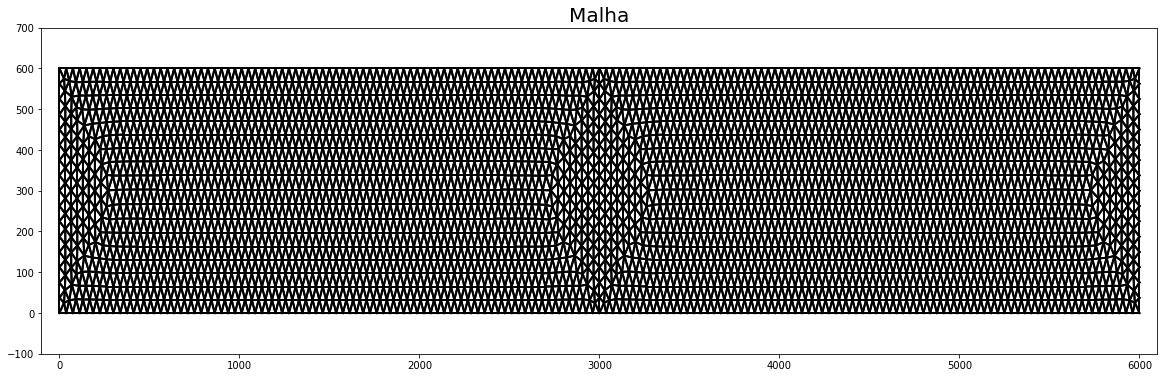

In [4]:
#--------------------------------------------------------------------------     
# 1. Plotagem da Malha
# ------------------------------------------------------------------------- 

XP=[]
YP=[]

for i in range (nE):
    k3            = int(IDE[0,i] -1)  # Indexador da matriz IDE
    k4            = int(IDE[1,i] -1)  # Indexador da matriz IDE
    k5            = int(IDE[2,i] -1)  # Indexador da matriz IDE
    X1            = cx[k3],cx[k4]
    X2            = cx[k4],cx[k5]
    X3            = cx[k5],cx[k3]
    XP.extend([X1]) 
    XP.extend([X2])
    XP.extend([X3])
    Y1            = cy[k3],cy[k4]
    Y2            = cy[k4],cy[k5] 
    Y3            = cy[k5],cy[k3] 
    YP.extend([Y1])
    YP.extend([Y2])
    YP.extend([Y3])

plt.figure(1, figsize=(20,6))
for i in range(3*nE):    
    plt.plot(XP[i],YP[i], color='black',linewidth='2')
    plt.title('Malha',fontsize=20)
plt.xlim(-100, 6100);
plt.ylim(-100, 700); 

In [5]:
# --------------------------------------------------------------------------     
# 2. Exportando os Resultados
# ------------------------------------------------------------------------- 

#2.1 Criando as labels dos graus de liberdade

uvi = []
for i in range(nn):
    ui  = n_id[i]
    uvi.extend (["u{}".format(ui)])
    vi  = n_id[i]
    uvi.extend (["v{}".format(ui)])

#2.2 Exportando os resultados para o arquivo 'dados_de_saida.xlsx'

df1    = pd.DataFrame(Ui,index=uvi,columns=['U(mm)'])
df2    = pd.DataFrame(Fg2,index=uvi,columns=['F(N)'])
df3    = pd.DataFrame(Epsilon,index=['Exx','Eyy','Exy'])
df4    = pd.DataFrame(Sigma,index=['Sxx','Syy','Sxy'])
df5    = pd.DataFrame(Aele,index=['Área(mm²)'])
writer = ExcelWriter('dados_de_saidaMALHA37.5.xlsx')
df1.to_excel(writer,'Deslocamentos Nodais',index=True)
df2.to_excel(writer,'Forças Internas', index=True) 
df3.to_excel(writer,'Deformações', index=True,header=E_id,index_label='EL') 
df4.to_excel(writer,'Tensões(mPa)', index=True,header=E_id,index_label='EL') 
df5.to_excel(writer,'Áreas(mm²)', index=True,header=E_id,index_label='EL') 
writer.save()

## 5. Validação <a name="section_4"></a> 

Para validar o algoritmo programado foi utilizado o software Ansys 2020R1. O elemento utilizado foi o Plane182 – Triangular:&nbsp;

<img src="img/img3.png" width="460px" />

A modelagem geométrica da malha foi dividida em duas áreas diferentes, com a divisão ocorrendo no centro do vão. Isso foi um artifício para forçar a existência de nós exatamente ao longo do centro da seção transversal de interesse para posterior análise. Além disso, foram aplicadas cargas de pressão na face superior da viga (Normais à face), que o próprio Ansys se encarrega de converter para carga nodal em uma rotina interna de cálculo. E ainda, foram impostos deslocamentos iguais à zero na linha esquerda da geometria (engaste):&nbsp;

<img src="img/img4.png" width="460px" />

A malha gerada para validação foi a de 37.5mm:&nbsp;

<img src="img/img5.png" width="460px" />

Na sequência são apresentados os Nós (18, 113, 112,111) e Elementos (2869, 2686, 5739, 5740) constituintes da Seção transversal do centro do vão (X=3000mm), que serão utilizados na validação:&nbsp;

<img src="img/img6.png" width="460px" />

### 5.1 Deslocamentos

Abaixo deslocamentos em Y obtidos no Ansys:

<img src="img/img7.png" width="460px" />

Quadro comparativo entre os resultados obtidos com o algoritmo deste artigo e o Ansys:

<img src="img/img8.png" width="460px" />

O algoritmo programado não apresentou diferença em relação ao Ansys no cálculo dos deslocamentos.

### 5.2 Deformações

Abaixo deformações em X obtidas no Ansys:

<img src="img/img9.png" width="460px" />

Quadro comparativo entre os resultados obtidos com o algoritmo deste artigo e o Ansys:

<img src="img/img10.png" width="460px" />

O algoritmo programado não apresentou diferença em relação ao Ansys no cálculo das deformações.

### 5.3 Tensões

Abaixo tensões em X obtidas no Ansys:

<img src="img/img11.png" width="460px" />

Quadro comparativo entre os resultados obtidos com o algoritmo deste artigo e o Ansys:

<img src="img/img12.png" width="460px" />

O algoritmo programado não apresentou diferença em relação ao Ansys no cálculo das tensões.

### 5.4 Conclusão

Verifica-se portanto que algoritmo programado não apresenta erros em relação aos resultados obtidos em um dos mais poderosos softwares de Elementos Finitos disponível no mercado, validando, portanto, o mesmo.

## 6. Referências<a name="section_6"></a> 

SORIANO, H. L. Elementos Finitos – Formulação e Aplicação na Estática e Dinâmica das Estruturas. Rio de Janeiro: Editora Ciência Moderna Ltda., 2009. &nbsp;  
&nbsp;  
HIBBELER, R. C. Análise das estruturas. São Paulo: Pearson Education do Brasil, 2013. &nbsp;  
&nbsp;  
BITTENCOURT, M. L. Análise computacional de estruturas: com aplicação do Método de Elementos Finitos. São Paulo: Editora da Unicamp, 2010.&nbsp;  
&nbsp;  
MALVERN, L. E. Introduction to the Mechanics of Continuous Medium. New Jersey: Prentice-Hall, Inc., 1969.&nbsp;  
&nbsp;  
ANSYS, INC. Disponível em: <https://www.mm.bme.hu/~gyebro/files/ans_help_v182/ans_elem/Hlp_E_PLANE182.html>. Acesso em: 20 out. 2020.